<a href="https://colab.research.google.com/github/aka-hombre/MAT421/blob/main/HWCH14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HW Module D: Section 1.1, 1.2, 1.3 and 1.4**#

#Sets:#

The ideas of mathmatetical sets, can be connected to objects in python like:



*   $\mathbb{N}= \{1, 2, 3, \dots\}\rightarrow$ **int()**
*   $\mathbb{W}= \{0\}\cup\mathbb{N}\rightarrow$ **int()**
*   $\mathbb{Z}= \{\dots, -2, -1, 0, 1, 2, \dots\}\rightarrow$ **int()**
*   $\mathbb{Q}= \{\frac{a}{b} | a\in \mathbb{Z} \wedge b\in\mathbb{N}, (a,b) =1\}\rightarrow$ **float()**
*   $\mathbb{I} = \{a\notin \mathbb{Q}\} \rightarrow$ [e,$\pi$, ... every non-ration]
*   $\mathbb{R}= \mathbb{I}\cup\mathbb{Q}\rightarrow$ **float()**
*   $\mathbb{C}= \{a+bi|a,b \in \mathbb{R}, i^2 = -1\}\rightarrow$ **complex()**


Lists and arrays are similar to vectors in python they can be described as

In [19]:
import numpy as np
from numpy.linalg import norm
vector_row = np.array([[1, -5, 3, 2, 4]])
vector_column = np.array([[1],
                          [2],
                          [3],
                          [4]])


print("vector1 (rows, collumns):   "+str(vector_row.shape)+"\n"+str(vector_row))
print("vector2 (rows, collumns):   "+str(vector_column.shape))
print(vector_column)

new_vector = vector_row.T
print("vector 1, transposed:")
print(new_vector)
norm_1 = norm(new_vector, 1)
norm_2 = norm(new_vector, 2)
norm_inf = norm(new_vector, np.inf)
print('Manhantan Distance is: %.1f'%norm_1)
print('Norm/Euclidean Distance: %.1f'%norm_2)
print('L_inf is: %.1f'%norm_inf)

vector1 (rows, collumns):   (1, 5)
[[ 1 -5  3  2  4]]
vector2 (rows, collumns):   (4, 1)
[[1]
 [2]
 [3]
 [4]]
vector 1, transposed:
[[ 1]
 [-5]
 [ 3]
 [ 2]
 [ 4]]
Manhantan Distance is: 15.0
Norm/Euclidean Distance: 7.4
L_inf is: 5.0


Vector operations can be performed with numpy, and matrices can be constructed.


In [30]:
import numpy as np


a = np.array([6,3,2])
print('Vectors')
print('a =',a)
b = np.array([3.5,2,7])
print('b =',b)
#matrix can also be constructed this way
mA= np.array([[1,2,3],[4,5,6],[-7,8.5,9]])
print('\nMatrix')
print('mA =',mA)
print("\n")

print('a*b =',a*b)
print('a/b =',a/b)
print('a+b =',a+b)
print('a-b =',a-b)
print('ln(a) =',np.log(a))

Vectors
a = [6 3 2]
b = [3.5 2.  7. ]

Matrix
mA = [[ 1.   2.   3. ]
 [ 4.   5.   6. ]
 [-7.   8.5  9. ]]


a*b = [21.  6. 14.]
a/b = [1.71428571 1.5        0.28571429]
a+b = [9.5 5.  9. ]
a-b = [ 2.5  1.  -5. ]
ln(a) = [1.79175947 1.09861229 0.69314718]


#Applications of Linear Algebra#

One of the main applications of linear algebra is finding solutions to systems of linear equations and regression.

In [41]:
import numpy as np

a = [[8, 3, -3], [-2, -8, 5], [3, 5, 10]]

def gseid(cmatrix, ys, epsilon=0.01, maxIterations=600):
    # Find diagonal coefficients
    diag = np.diag(np.abs(cmatrix))

    # Find row sum without diagonal
    off_diag = np.sum(np.abs(cmatrix), axis=1) - diag

    if np.all(diag > off_diag):
        print('matrix is diagonally dominant')
    else:
        print('NOT diagonally dominant')

    x = np.zeros(cmatrix.shape[1])
    x_old = np.zeros(cmatrix.shape[1])
    converged = False

    print('Iteration results')
    print(' k,    x')

    for k in range(1, maxIterations):
        for i in range(len(x)):
            corr = 0
            for j in range(len(x)):
                if i != j:
                    corr += cmatrix[i, j] * x[j]
            x[i] = (ys[i] - corr) / cmatrix[i, i]

        # Check for convergence
        dx = np.sqrt(np.dot(x - x_old, x - x_old))
        print("%d " % (k), x)

        if dx < epsilon:
            converged = True
            print('Converged!')
            break

        # Assign a copy of the latest x value to the old value
        x_old = np.copy(x)

    if not converged:
        print("not converged, iterate some more homie")

    return x

coeffMatrix = np.array(a, dtype=float)
ys = np.array([14, 5, -8], dtype=float)
xGS = gseid(coeffMatrix, ys, epsilon=0.0001)


matrix is diagonally dominant
Iteration results
 k,    x
1  [ 1.75    -1.0625  -0.79375]
2  [ 1.85078125 -1.58378906 -0.56333984]
3  [ 2.13266846 -1.51025452 -0.68467328]
4  [ 2.05959296 -1.56781904 -0.63396837]
5  [ 2.100194   -1.54627873 -0.65691883]
6  [ 2.08350996 -1.55645176 -0.64682711]
7  [ 2.09110925 -1.55204425 -0.65131065]
8  [ 2.0877751  -1.55401293 -0.64932607]
9  [ 2.08925757 -1.55314318 -0.65020568]
10  [ 2.08860156 -1.55352894 -0.649816  ]
11  [ 2.08889235 -1.55335809 -0.64998866]
12  [ 2.08876353 -1.5534338  -0.64991216]
13  [ 2.08882061 -1.55340025 -0.64994606]
Converged!


Numpy has a built in way to generate solutions too!

In [42]:

x = np.linalg.solve(coeffMatrix, ys)
print('Python solution',x)
print('Diff=', np.mean((x-xGS)**2 )**.5)

Python solution [ 2.08880309 -1.55341055 -0.64993565]
Diff= 1.3184439252485712e-05


##Linear Regression##

Where as interpolation requires us to find a function to pass through all our data points, regression requires us to find a function that is the closest to all the points. Numpy is good for this:

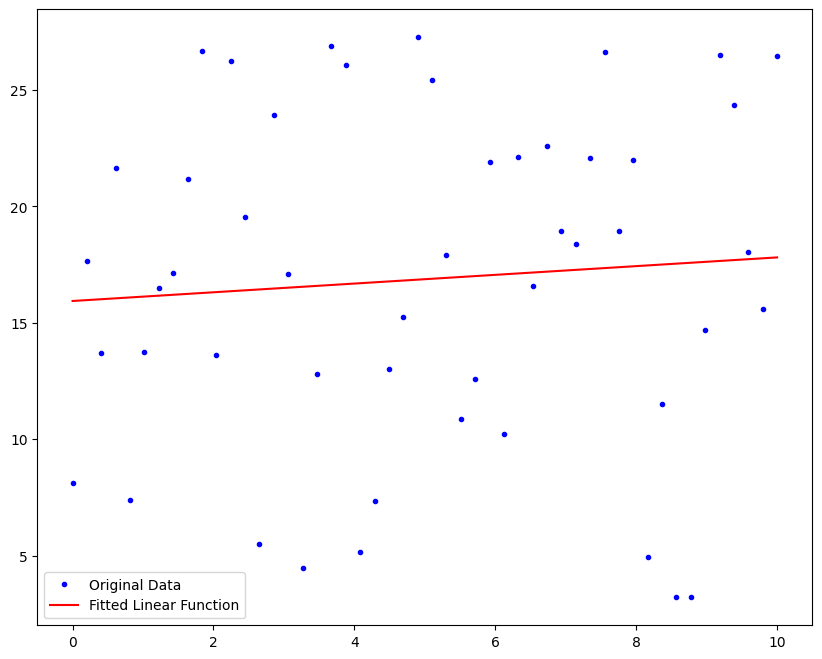

In [60]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(0, 10)
y = np.random.randint(0, 5) + (np.random.rand(len(xx)) * 25)

# We are looking at linear data, so we need 2 columns to define the parameters
A = np.vstack([xx, np.ones(len(xx))]).T

# Perform a standard linear algebra inverse
alpha = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)

# Plot the original data points and the fitted linear function
plt.figure(figsize=(10, 8))
plt.plot(xx, y, 'b.', label='Original Data')
plt.plot(xx, alpha[0] * xx + alpha[1], 'r', label='Fitted Linear Function')
plt.legend()
plt.show()
